In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import time
import random
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as skc
from sklearn.model_selection import train_test_split
plt.style.use('bmh')
plt.rcParams["figure.dpi"] = 96
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_valorant = pd.read_csv('df_valorant.csv')

In [3]:
duplicate = df_valorant[df_valorant.duplicated()]
 
print("Duplicate Rows :")
 
duplicate

Duplicate Rows :


,Unnamed: 0,index,eventId,seriesId,matchId,teamId,teamName,map,oppTeamId,oppTeamName,...,clutchOpponents,clutchOpportunities,KDR,KD,FKD,KDA,spentCreds,loadoutValue,avgEconRating,dates


In [4]:
df_valorant.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df_valorant.columns

Index(['index', 'eventId', 'seriesId', 'matchId', 'teamId', 'teamName', 'map',
       'oppTeamId', 'oppTeamName', 'teamScore', 'atkFirst', 'won', 'acs',
       'kills', 'firstKills', 'deaths', 'firstDeaths', 'assists', 'damage',
       'headshots', 'bodyshots', 'legshots', 'plants', 'defusals', 'clutches',
       'clutchOpponents', 'clutchOpportunities', 'KDR', 'KD', 'FKD', 'KDA',
       'spentCreds', 'loadoutValue', 'avgEconRating', 'dates'],
      dtype='object')

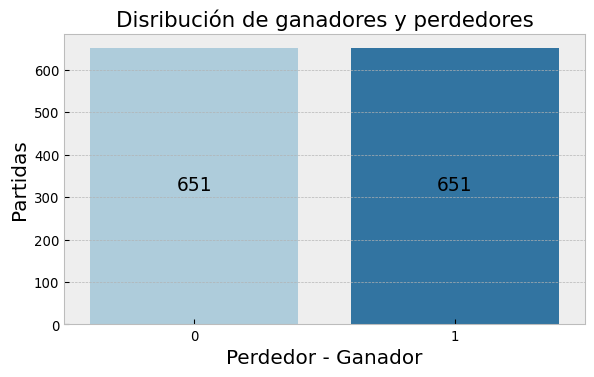

In [6]:
fig, ax = plt.subplots(figsize=(7,4))

barchart = sns.countplot(data=df_valorant, x='won', dodge=True,
                         fill=True, palette=sns.color_palette("Paired", 2))

plt.title('Disribución de ganadores y perdedores',fontsize = 16)
plt.xlabel('Perdedor - Ganador', fontsize = 15)
plt.ylabel('Partidas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=1, size=14)
plt.show();

In [7]:
top_teams = {'617': 'FAZE',
             '305': '100T',
             '141': 'C9',
             '278': 'TSM',
             '281': 'RISE',
             '388': 'SEN',
             '603': 'XSET',
             '279': 'LG',
             '75': 'ENVY',
             '215': 'T1',
             '318':'GENG'
}

In [8]:
most_winners = df_valorant[['teamId', 'won']]
most_winners = most_winners.groupby('teamId', sort=False).sum()
most_winners = most_winners.reset_index()
most_winners = most_winners[['teamId', 'won']].sort_values(by='won', ascending=False).head(10)
most_winners['teamId'] = most_winners['teamId'].astype(str)

In [9]:
most_played = df_valorant[['teamId']]
most_played = most_played['teamId'].value_counts().rename_axis('teamId').reset_index(name='counts')
most_played = most_played[['teamId', 'counts']].sort_values(by='counts', ascending=False).head(10)
most_played['teamId'] = most_played['teamId'].astype(str)
most_played['team_name'] = most_played['teamId'].map(top_teams)

most_played

,teamId,counts,team_name
0,305,46,100T
1,617,46,FAZE
2,281,45,RISE
3,603,41,XSET
4,278,37,TSM
5,279,37,LG
6,318,34,GENG
7,141,34,C9
9,388,32,SEN
8,75,32,ENVY


In [10]:
most_winners['team_name'] = most_winners['teamId'].map(top_teams)

In [11]:
most_winners

,teamId,won,team_name
28,617,28,FAZE
38,305,27,100T
75,141,26,C9
16,278,26,TSM
119,388,25,SEN
102,281,25,RISE
30,603,24,XSET
0,279,22,LG
21,75,20,ENVY
35,215,19,T1


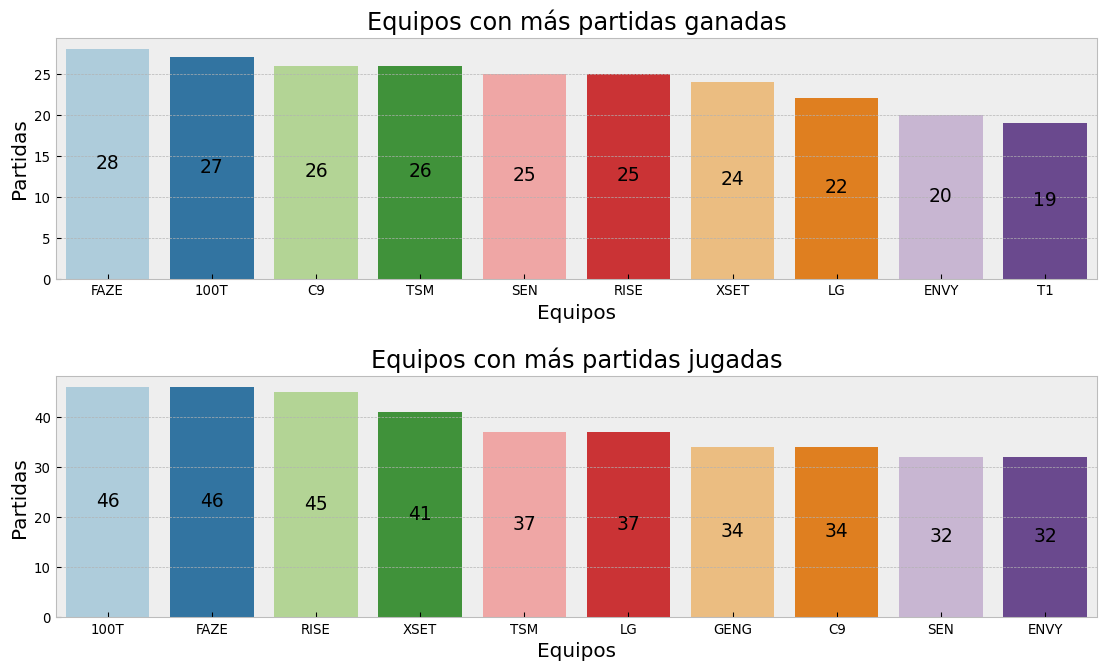

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.subplots_adjust(hspace=0.4)

ax1 = sns.barplot(ax=axes[0], x=most_winners.team_name, y=most_winners.won,
                  fill=True, palette=sns.color_palette("Paired", 10),
                  order=most_winners.sort_values('won',ascending = False).team_name)
axes[0].bar_label(ax1.containers[0], label_type='center', padding=1, size=14)
axes[0].set_title('Equipos con más partidas ganadas',fontsize = 18)
axes[0].set_xlabel('Equipos', fontsize = 15)
axes[0].set_ylabel('Partidas', fontsize = 15)

ax2 = sns.barplot(ax=axes[1], x=most_played.team_name, y=most_played.counts,
                  fill=True, palette=sns.color_palette("Paired", 10),
                  order=most_played.sort_values('counts',ascending = False).team_name)
axes[1].bar_label(ax2.containers[0], label_type='center', padding=1, size=14)
axes[1].set_title('Equipos con más partidas jugadas',fontsize = 18)
axes[1].set_xlabel('Equipos', fontsize = 15)
axes[1].set_ylabel('Partidas', fontsize = 15);
plt.savefig('equipos1.png', dpi=300)

In [13]:
top_stats_teams = {'617': 'FAZE',
                   '305': '100T',
                   '141': 'C9',
                   '278': 'TSM',
                   '281': 'RISE',
                   '388': 'SEN',
                   '603': 'XSET',
                   '279': 'LG',
                   '75': 'ENVY',
                   '215': 'T1',
                   '318' :'GENG',
                   '379': 'COL',
                   '3324': 'SOAR',
                   '3975': 'KCP',
                   '3702': 'LEVI',
                   '771': 'LRS',
                   '417': 'IMT',
                   '863': 'YFP'
}

Obtenemos algunos indicadores de los equipos.

In [14]:
best_avgEconRating = df_valorant[['teamId', 'avgEconRating']].sort_values(by='avgEconRating', ascending=False).head()
best_KDR = df_valorant[['teamId', 'KDR']].sort_values(by='KDR', ascending=False).head()
best_damage = df_valorant[['teamId', 'damage']].sort_values(by='damage', ascending=False).head()
most_kills = df_valorant[['teamId', 'kills']].sort_values(by='kills', ascending=False)
most_firstKills = df_valorant[['teamId', 'firstKills']].sort_values(by='firstKills', ascending=False)
best_acs = df_valorant[['teamId', 'acs']].sort_values(by='acs', ascending=False).head()

In [15]:
best_avgEconRating = round(best_avgEconRating, 2)
best_KDR = round(best_KDR, 2)
best_damage = round(best_damage, 2)
best_acs = round(best_acs, 2)

In [16]:
most_kills = most_kills.groupby('teamId', sort=False).max().head().reset_index()
most_firstKills = most_firstKills.groupby('teamId', sort=False).max().head().reset_index()

In [17]:
best_avgEconRating['teamId'] = best_avgEconRating['teamId'].astype(str)
best_avgEconRating['team_name'] = best_avgEconRating['teamId'].map(top_stats_teams)

best_avgEconRating

,teamId,avgEconRating,team_name
623,278,90.90,TSM
772,215,88.70,T1
247,379,88.43,COL
768,141,88.31,C9
65,3324,86.81,SOAR


In [18]:
best_KDR['teamId'] = best_KDR['teamId'].astype(str)
best_KDR['team_name'] = best_KDR['teamId'].map(top_stats_teams)

best_KDR

,teamId,KDR,team_name
38,75,3.58,ENVY
138,3975,3.47,KCP
562,3702,3.42,LEVI
563,278,3.14,TSM
592,617,3.09,FAZE


In [19]:
best_damage['teamId'] = best_damage['teamId'].astype(str)
best_damage['team_name'] = best_damage['teamId'].map(top_stats_teams)

best_damage

,teamId,damage,team_name
951,771,174.19,LRS
1298,141,172.46,C9
247,379,171.14,COL
774,417,168.58,IMT
623,278,167.87,TSM


In [20]:
best_acs['teamId'] = best_acs['teamId'].astype(str)
best_acs['team_name'] = best_acs['teamId'].map(top_stats_teams)

best_acs

,teamId,acs,team_name
247,379,266.48,COL
951,771,265.89,LRS
116,863,265.33,YFP
567,617,264.90,FAZE
1298,141,264.82,C9


In [21]:
most_kills['teamId'] = most_kills['teamId'].astype(str)
most_kills['team_name'] = most_kills['teamId'].map(top_stats_teams)

most_kills

,teamId,kills,team_name
0,318,441,GENG
1,278,423,TSM
2,617,360,FAZE
3,279,303,LG
4,3975,291,KCP


In [22]:
most_firstKills['teamId'] = most_firstKills['teamId'].astype(str)
most_firstKills['team_name'] = most_firstKills['teamId'].map(top_stats_teams)

most_firstKills

,teamId,firstKills,team_name
0,278,72,TSM
1,3975,51,KCP
2,318,48,GENG
3,279,48,LG
4,617,48,FAZE


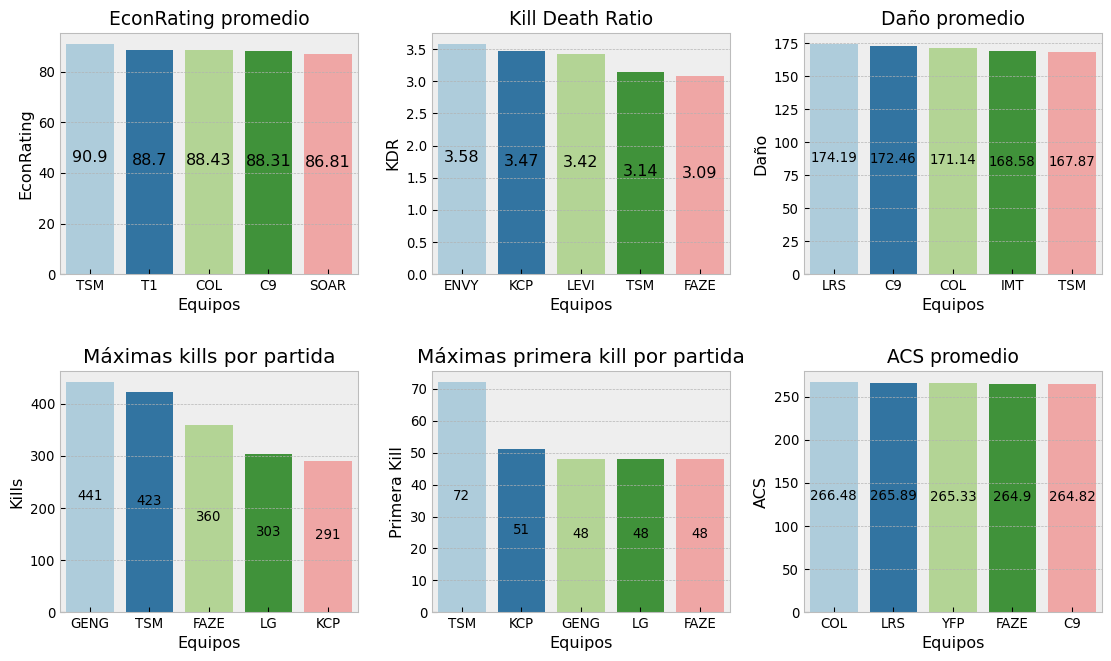

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.25)

ax1 = sns.barplot(ax=axes[0,0], x=best_avgEconRating.team_name, y=best_avgEconRating.avgEconRating,
                  fill=True, palette=sns.color_palette("Paired", 5),
                  order=best_avgEconRating.sort_values('avgEconRating', ascending=False).team_name)
axes[0,0].bar_label(ax1.containers[0], label_type='center', padding=1, size=12)
axes[0,0].set_title('EconRating promedio', fontsize = 14)
axes[0,0].set_ylabel('EconRating', fontsize = 12)
axes[0,0].set_xlabel('Equipos', fontsize = 12)

ax2 = sns.barplot(ax=axes[0,1], x=best_KDR.team_name, y=best_KDR.KDR,
                  fill=True, palette=sns.color_palette("Paired", 5),
                  order=best_KDR.sort_values('KDR', ascending=False).team_name)
axes[0,1].bar_label(ax2.containers[0], label_type='center', padding=1, size=12)
axes[0,1].set_title('Kill Death Ratio', fontsize = 14)
axes[0,1].set_ylabel('KDR', fontsize = 12)
axes[0,1].set_xlabel('Equipos', fontsize = 12)

ax3 = sns.barplot(ax=axes[0,2], x=best_damage.team_name, y=best_damage.damage,
                  fill=True, palette=sns.color_palette("Paired", 5),
                  order=best_damage.sort_values('damage', ascending=False).team_name)
axes[0,2].bar_label(ax3.containers[0], label_type='center', padding=1, size=10)
axes[0,2].set_title('Daño promedio', fontsize = 14)
axes[0,2].set_ylabel('Daño', fontsize = 12)
axes[0,2].set_xlabel('Equipos', fontsize = 12)

ax4 = sns.barplot(ax=axes[1,0], x=most_kills.team_name, y=most_kills.kills,
                  fill=True, palette=sns.color_palette("Paired", 5),
                  order=most_kills.sort_values('kills', ascending=False).team_name)
axes[1,0].bar_label(ax4.containers[0], label_type='center', padding=1)
axes[1,0].set_title('Máximas kills por partida', fontsize = 15)
axes[1,0].set_ylabel('Kills', fontsize = 12)
axes[1,0].set_xlabel('Equipos', fontsize = 12)

ax5 = sns.barplot(ax=axes[1,1], x=most_firstKills.team_name, y=most_firstKills.firstKills,
                  fill=True, palette=sns.color_palette("Paired", 5),
                  order=most_firstKills.sort_values('firstKills', ascending=False).team_name)
axes[1,1].bar_label(ax5.containers[0], label_type='center', padding=1)
axes[1,1].set_title('Máximas primera kill por partida', fontsize = 15)
axes[1,1].set_ylabel('Primera Kill', fontsize = 12)
axes[1,1].set_xlabel('Equipos', fontsize = 12)

ax6 = sns.barplot(ax=axes[1,2], x=best_acs.team_name, y=best_acs.acs,
                  fill=True, palette=sns.color_palette("Paired", 5),
                  order=best_acs.sort_values('acs', ascending=False).team_name)
axes[1,2].bar_label(ax6.containers[0], label_type='center', padding=1, size=10)
axes[1,2].set_title('ACS promedio', fontsize = 14)
axes[1,2].set_ylabel('ACS', fontsize = 12)
axes[1,2].set_xlabel('Equipos', fontsize = 12);
plt.savefig('equipos2.png', dpi=300)

Cual es el mapa más frecuente en el dataframe.

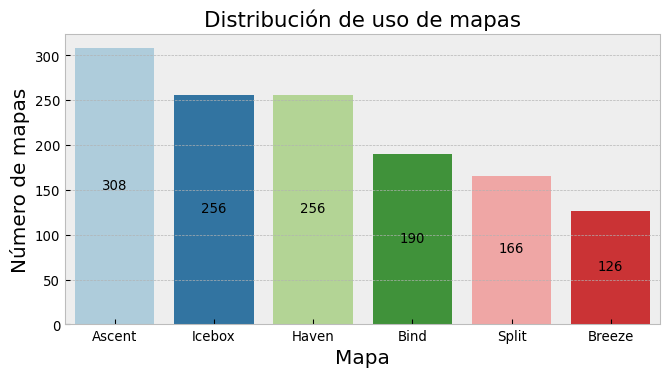

<Figure size 576x384 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize=(8,4))

barchart = sns.countplot(data=df_valorant, x='map', 
                         fill=True, palette=sns.color_palette("Paired", 6),
                         order=df_valorant['map'].value_counts().index)

plt.title('Distribución de uso de mapas',fontsize = 16)
plt.xlabel('Mapa', fontsize = 15)
plt.ylabel('Número de mapas', fontsize = 15)
barchart.bar_label(ax.containers[0], label_type='center', padding=1)
plt.show();
plt.savefig('mapas1.png', dpi=300)

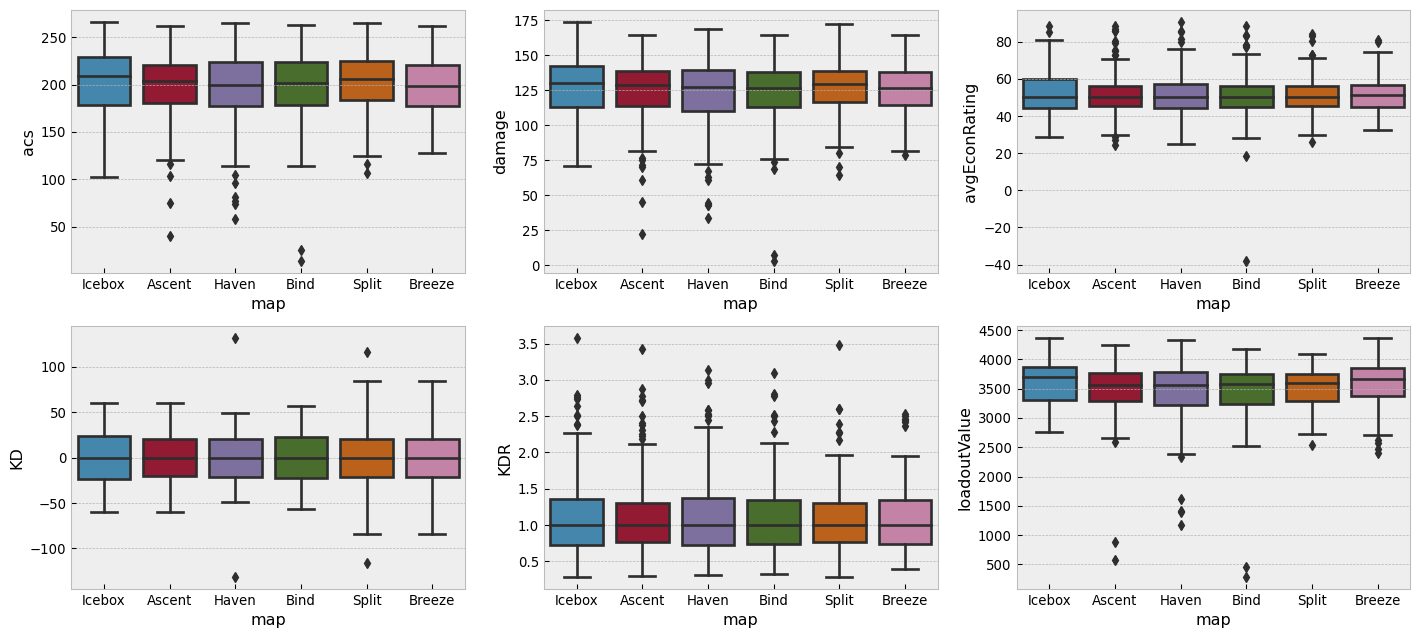

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

#fig.suptitle('Indicadores por mapa')

sns.boxplot(ax=axes[0, 0], data=df_valorant, x='map', y='acs')
sns.boxplot(ax=axes[0, 1], data=df_valorant, x='map', y='damage')
sns.boxplot(ax=axes[0, 2], data=df_valorant, x='map', y='avgEconRating')
sns.boxplot(ax=axes[1, 0], data=df_valorant, x='map', y='KD')
sns.boxplot(ax=axes[1, 1], data=df_valorant, x='map', y='KDR')
sns.boxplot(ax=axes[1, 2], data=df_valorant, x='map', y='loadoutValue');
plt.savefig('boxplot1.png', dpi=300)

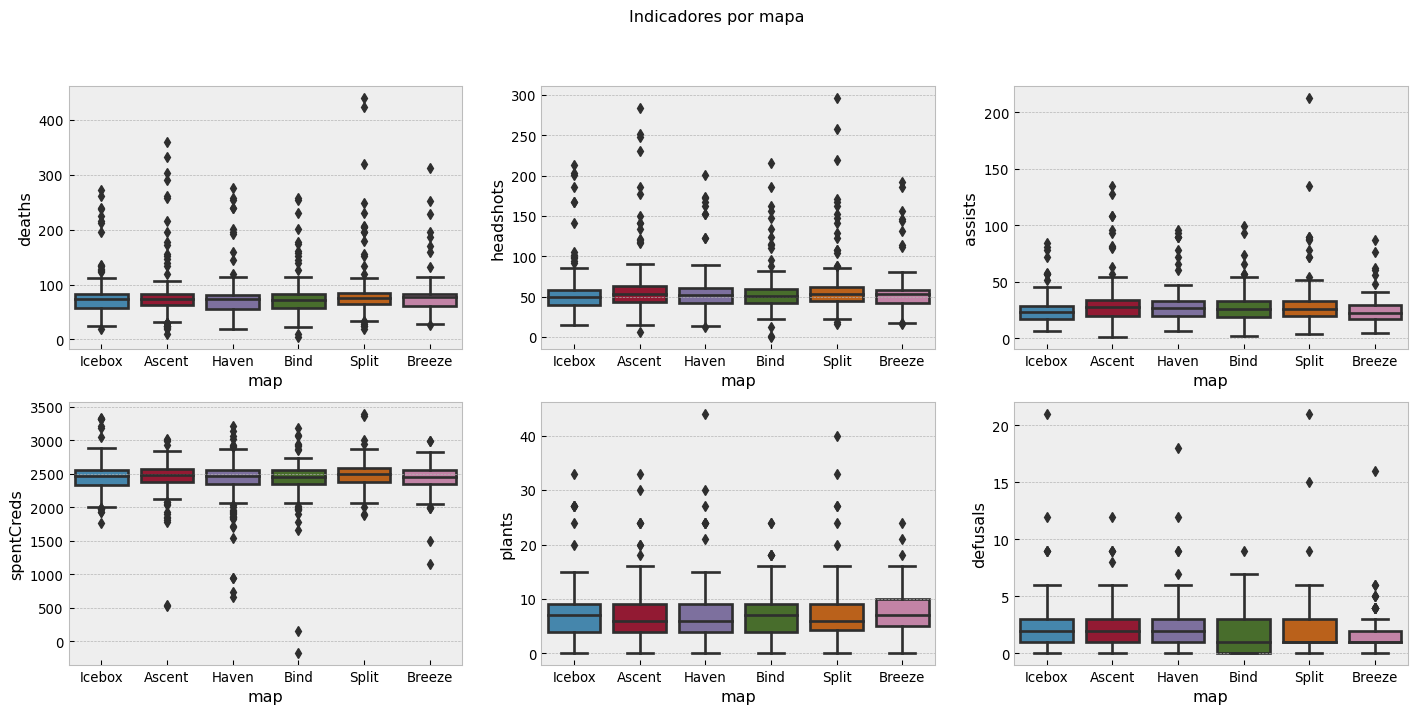

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

fig.suptitle('Indicadores por mapa')

sns.boxplot(ax=axes[0, 0], data=df_valorant, x='map', y='deaths')
sns.boxplot(ax=axes[0, 1], data=df_valorant, x='map', y='headshots')
sns.boxplot(ax=axes[0, 2], data=df_valorant, x='map', y='assists')
sns.boxplot(ax=axes[1, 0], data=df_valorant, x='map', y='spentCreds')
sns.boxplot(ax=axes[1, 1], data=df_valorant, x='map', y='plants')
sns.boxplot(ax=axes[1, 2], data=df_valorant, x='map', y='defusals');
plt.savefig('boxplot2.png', dpi=300)

A continuación, agrupamos por la variable objetivo 'won' para observar cuales son algunos de los indicadores promedio por triunfo y por derrota.

In [27]:
matches_stats = df_valorant.groupby('won')['acs','kills','clutches','deaths','headshots',
                                           'spentCreds','assists','plants','defusals',
                                           'avgEconRating','damage','KDR','loadoutValue'].mean()
matches_stats

,acs,kills,clutches,deaths,headshots,spentCreds,assists,plants,defusals,avgEconRating,damage,KDR,loadoutValue
won,,,,,,,,,,,,,
0,174.992421,65.669739,1.278034,87.354839,50.686636,2498.886059,23.371736,5.924731,1.468510,44.506647,111.236117,0.731255,3252.488070
1,224.436131,87.337942,1.996928,65.700461,60.987711,2388.028243,30.987711,7.966206,2.399386,58.590395,138.360871,1.472922,3760.829543


In [28]:
df_valorant.columns

Index(['index', 'eventId', 'seriesId', 'matchId', 'teamId', 'teamName', 'map',
       'oppTeamId', 'oppTeamName', 'teamScore', 'atkFirst', 'won', 'acs',
       'kills', 'firstKills', 'deaths', 'firstDeaths', 'assists', 'damage',
       'headshots', 'bodyshots', 'legshots', 'plants', 'defusals', 'clutches',
       'clutchOpponents', 'clutchOpportunities', 'KDR', 'KD', 'FKD', 'KDA',
       'spentCreds', 'loadoutValue', 'avgEconRating', 'dates'],
      dtype='object')

In [29]:
df_corr_valorant = df_valorant[['map', 'atkFirst', 'won', 'acs',
       'kills', 'firstKills', 'deaths', 'firstDeaths', 'assists', 'damage',
       'headshots', 'bodyshots', 'legshots', 'plants', 'defusals', 'clutches',
       'clutchOpponents', 'clutchOpportunities', 'KDR', 'KD', 'FKD', 'KDA',
       'spentCreds', 'loadoutValue', 'avgEconRating']]

Se implementa una visualización de correlación respecto a la variable objetivo.

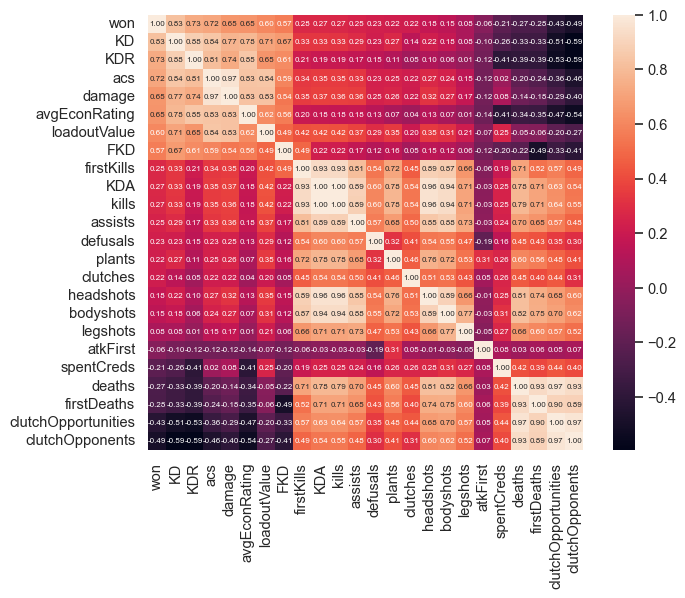

In [30]:
plt.figure(figsize = (8,6))

corrmat = df_corr_valorant.corr()
k = 29 
cols = corrmat.nlargest(k, 'won')['won'].index
cm = np.corrcoef(df_valorant[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 6}, yticklabels=cols.values, 
                 xticklabels=cols.values)

plt.show();

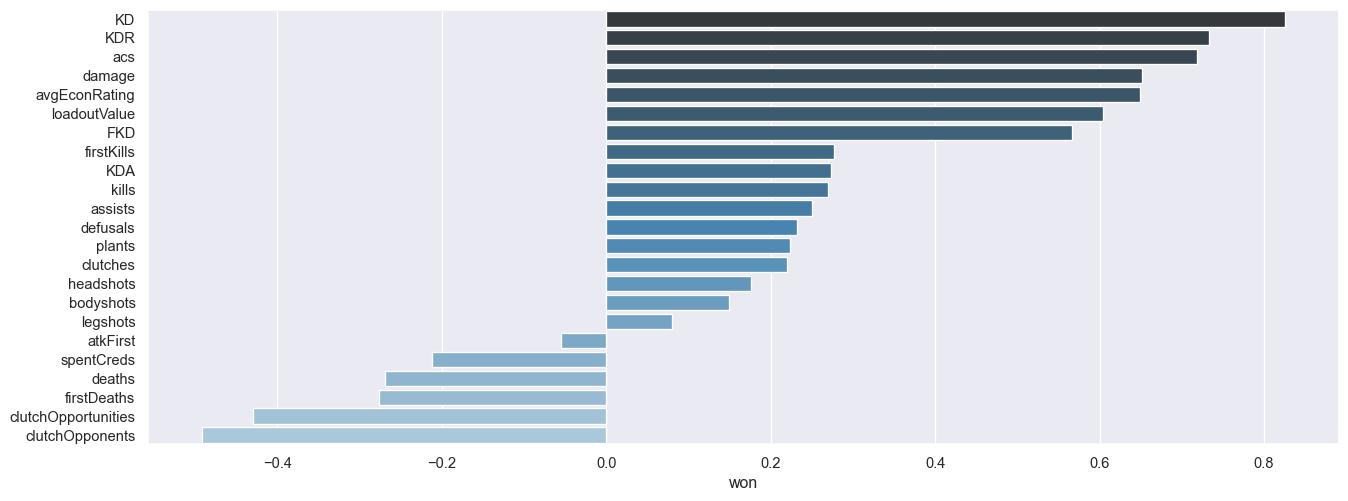

In [31]:
plt.figure(figsize=(16,6))
rank_corr = df_corr_valorant.corr()['won'].drop(['won'])
rank_corr = rank_corr.sort_values(ascending=False)

pal = sns.color_palette("Blues_d", len(rank_corr))
rank = rank_corr.argsort()

sns.barplot(y=rank_corr.index, x=rank_corr, palette=np.array(pal[::])[rank])

plt.show();

In [32]:
more_corr = df_valorant[['map','avgEconRating','acs','KD','KDR','damage','loadoutValue','won']]

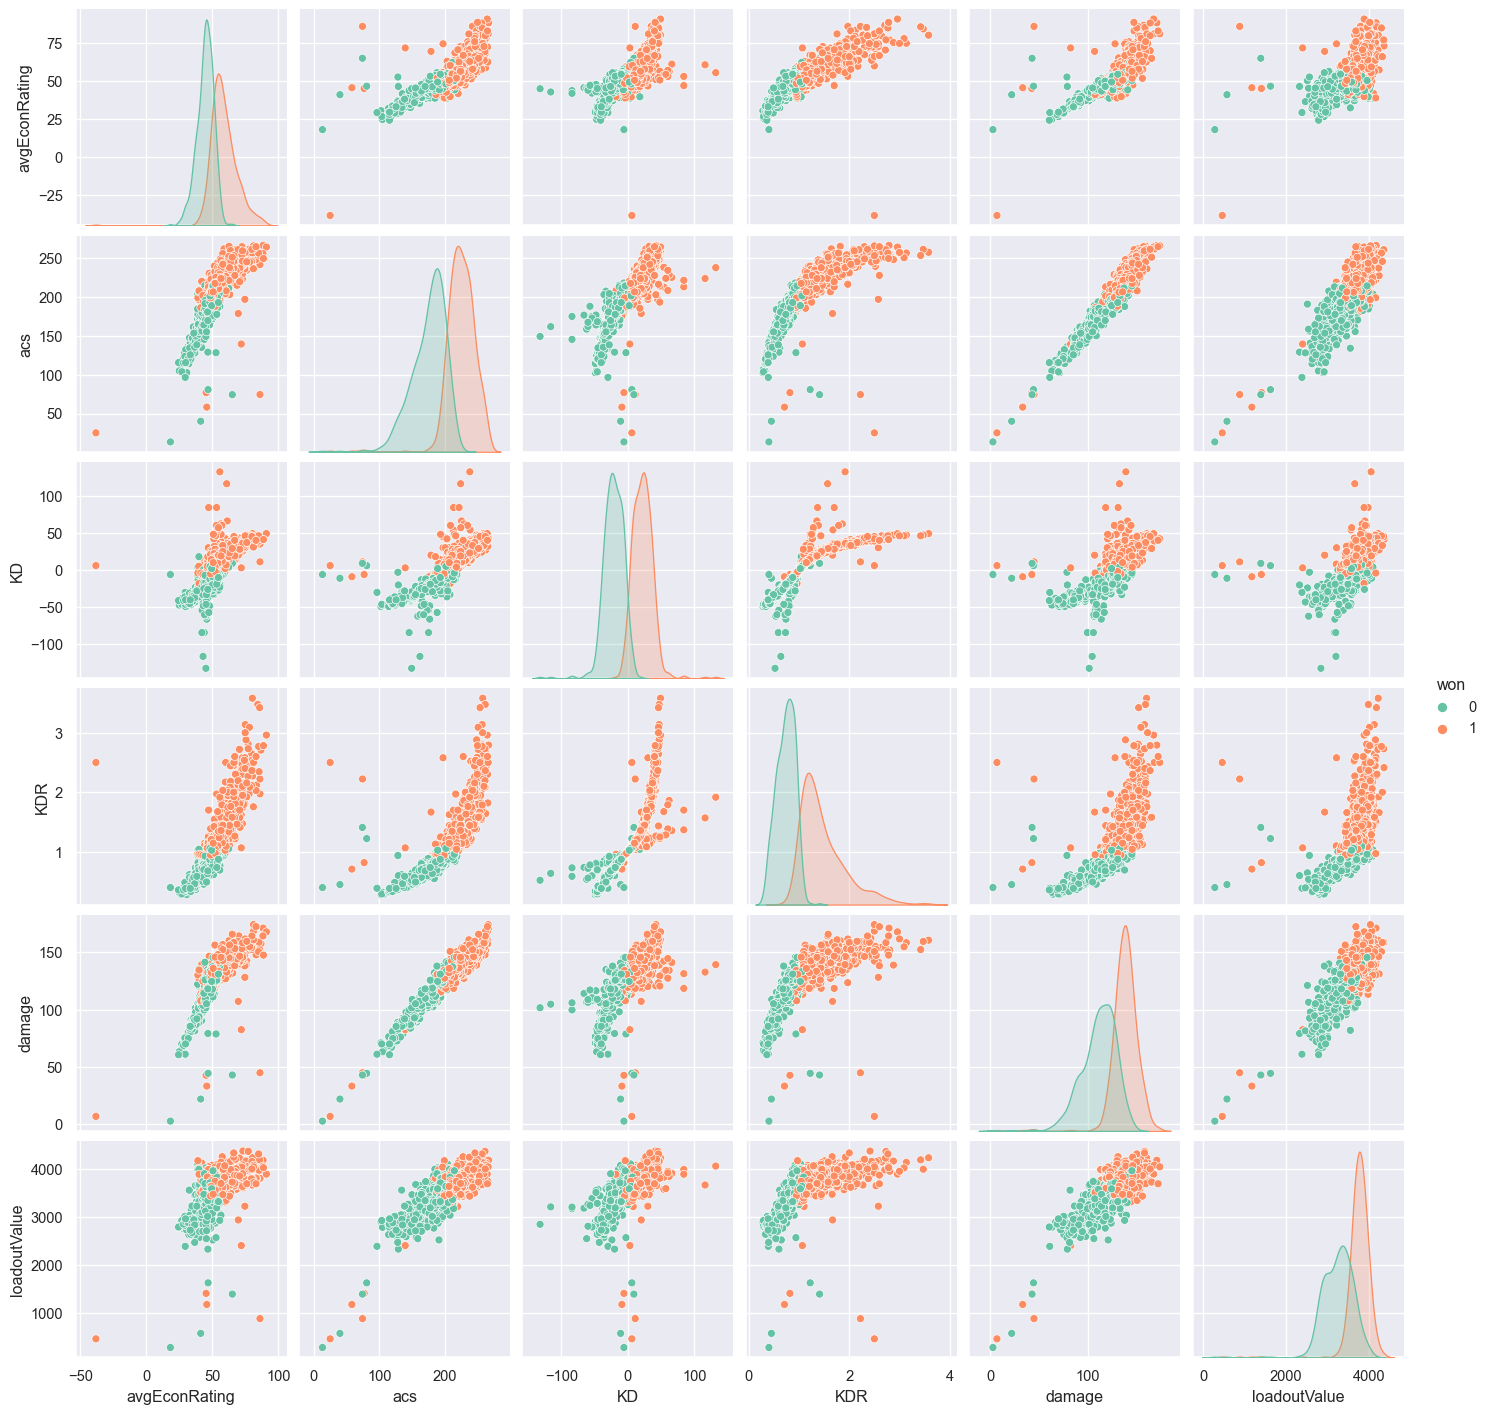

In [33]:
g = sns.pairplot(more_corr, hue="won", palette="Set2", diag_kind="kde", height=2.5)

In [34]:
df_valorant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1302 non-null   int64  
 1   eventId              1302 non-null   int64  
 2   seriesId             1302 non-null   int64  
 3   matchId              1302 non-null   int64  
 4   teamId               1302 non-null   int64  
 5   teamName             1302 non-null   object 
 6   map                  1302 non-null   object 
 7   oppTeamId            1302 non-null   int64  
 8   oppTeamName          1302 non-null   object 
 9   teamScore            1302 non-null   int64  
 10  atkFirst             1302 non-null   int64  
 11  won                  1302 non-null   int64  
 12  acs                  1302 non-null   float64
 13  kills                1302 non-null   int64  
 14  firstKills           1302 non-null   int64  
 15  deaths               1302 non-null   i

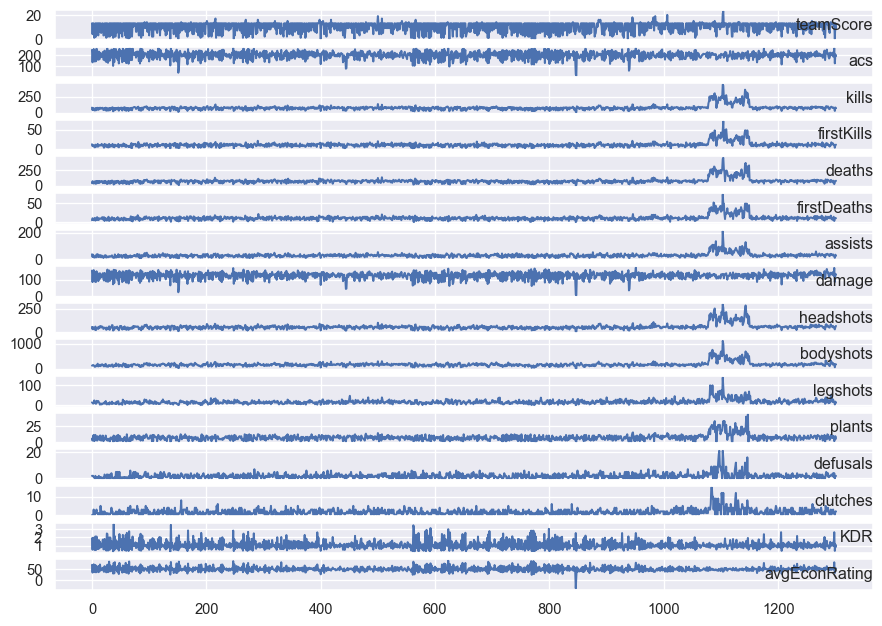

In [35]:
values = df_valorant.values

groups = [9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 33]
i = 1

plt.figure(figsize =(11, 8))
for group in groups:
 plt.subplot(len(groups), 1, i)
 plt.plot(values[:, group])
 plt.title(df_valorant.columns[group], y=0.1, loc='right')
 i += 1

plt.show();

In [36]:
df_valorant.columns

Index(['index', 'eventId', 'seriesId', 'matchId', 'teamId', 'teamName', 'map',
       'oppTeamId', 'oppTeamName', 'teamScore', 'atkFirst', 'won', 'acs',
       'kills', 'firstKills', 'deaths', 'firstDeaths', 'assists', 'damage',
       'headshots', 'bodyshots', 'legshots', 'plants', 'defusals', 'clutches',
       'clutchOpponents', 'clutchOpportunities', 'KDR', 'KD', 'FKD', 'KDA',
       'spentCreds', 'loadoutValue', 'avgEconRating', 'dates'],
      dtype='object')

In [37]:
pca_features = df_valorant[['eventId', 'seriesId', 'matchId', 'teamId', 'oppTeamId', 'teamScore', 'map',
                            'atkFirst', 'acs', 'kills', 'firstKills', 'deaths', 'firstDeaths', 'assists', 'damage',
                            'headshots', 'bodyshots', 'legshots', 'plants', 'defusals', 'clutches',
                            'clutchOpponents', 'clutchOpportunities', 'KDR', 'KD', 'FKD', 'KDA',
                            'spentCreds', 'loadoutValue', 'avgEconRating']]

pca_target = df_valorant[['won']]

In [38]:
pca_features = pd.get_dummies(pca_features, prefix=['map'], columns=['map'])

In [39]:
scaling=StandardScaler()
 
scaling.fit(pca_features)
Scaled_data=scaling.transform(pca_features)

principal=PCA(n_components=15)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
print(x.shape)

(1302, 15)


In [40]:
print(principal.explained_variance_ratio_)

[0.30066709 0.215713   0.0862351  0.03992764 0.0387599  0.03552141
 0.0344185  0.03381226 0.03239096 0.03154469 0.02647363 0.02295955
 0.02052564 0.01570351 0.01468499]


In [41]:
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
print(x.shape)

(1302, 3)


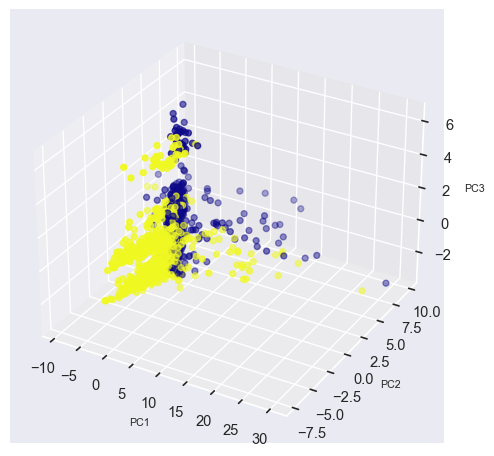

In [42]:
fig = plt.figure(figsize=(6,6))
 
axis = fig.add_subplot(111, projection='3d')
 
axis.scatter(x[:,0],x[:,1],x[:,2], c=pca_target['won'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=8)
axis.set_ylabel("PC2", fontsize=8)
axis.set_zlabel("PC3", fontsize=8);

In [43]:
df_cluster = df_valorant[['eventId', 'seriesId', 'matchId', 'teamId', 'oppTeamId', 'teamScore', 'map',
                          'atkFirst', 'acs', 'kills', 'firstKills', 'deaths', 'firstDeaths', 'assists', 'damage',
                          'headshots', 'bodyshots', 'legshots', 'plants', 'defusals', 'clutches',
                          'clutchOpponents', 'clutchOpportunities', 'KDR', 'KD', 'FKD', 'KDA',
                          'spentCreds', 'loadoutValue', 'avgEconRating', 'won']]

In [44]:
df_cluster = pd.get_dummies(df_cluster, prefix=['map'], columns=['map'])

In [45]:
df_cluster.head()

,eventId,seriesId,matchId,teamId,oppTeamId,teamScore,atkFirst,acs,kills,firstKills,...,spentCreds,loadoutValue,avgEconRating,won,map_Ascent,map_Bind,map_Breeze,map_Haven,map_Icebox,map_Split
0,566,14116,28923,279,2367,13,0,247.905882,77,12,...,2197.058824,4020.000000,70.929050,1,0,0,0,0,1,0
1,566,14164,29066,4002,978,4,0,134.729412,37,7,...,2420.000000,2860.588235,35.094798,0,1,0,0,0,0,0
2,566,14164,29066,978,4002,13,1,231.800000,72,10,...,2079.411765,3867.647059,69.765205,1,1,0,0,0,0,0
3,566,14159,29052,3530,799,13,1,256.357143,67,9,...,2159.285714,3775.714286,73.661925,1,0,0,0,0,1,0
4,566,14159,29052,799,3530,1,0,168.857143,37,5,...,2507.857143,3003.571429,40.074053,0,0,0,0,0,1,0


In [46]:
scaler = StandardScaler()

scaled = scaler.fit_transform(df_cluster)

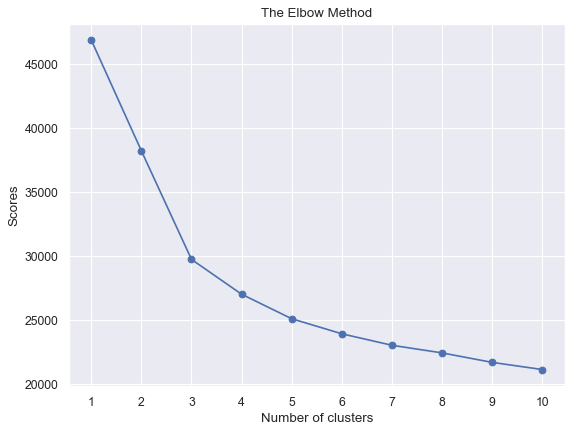

In [47]:
scores=[]

k_range = range(1,11)

for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=24)
    kmeans.fit(scaled)
    scores.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, scores, marker='o')

    
plt.xticks(k_range)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.savefig('num_clust.png')
plt.show();

Observamos la sumatoria de las distancias intra clases.

In [48]:
kmeans.inertia_

21147.54362079955

Observamos los centroides por cada cluster.

In [49]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
y_kmeans = kmeans.predict(scaled)
labels = kmeans.labels_

In [50]:
kmeans.cluster_centers_.shape

(3, 36)

In [51]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df_cluster])
cluster_centers

,eventId,seriesId,matchId,teamId,oppTeamId,teamScore,atkFirst,acs,kills,firstKills,...,spentCreds,loadoutValue,avgEconRating,won,map_Ascent,map_Bind,map_Breeze,map_Haven,map_Icebox,map_Split
0,0.011670,0.013625,0.012491,-0.248816,0.269549,0.728702,-0.065366,0.687508,0.123568,0.144693,...,-0.052998,0.622377,0.582151,0.750355,0.000754,-0.007554,0.003714,-0.009342,0.029916,-0.020774
1,-0.069859,-0.079270,-0.081151,0.394102,-0.281298,-0.996593,0.080248,-0.896637,-0.565409,-0.571198,...,0.030151,-0.843421,-0.740128,-0.981413,0.003198,0.007845,-0.006693,0.019727,-0.022364,-0.003304
2,0.497569,0.560037,0.590730,-0.620525,-0.655821,0.380204,0.049311,-0.039022,3.679223,3.479598,...,0.358344,0.253982,-0.207246,-0.016949,-0.038168,0.018732,0.016644,-0.068259,-0.153550,0.278366


In [52]:
cluster_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (eventId,)              3 non-null      float64
 1   (seriesId,)             3 non-null      float64
 2   (matchId,)              3 non-null      float64
 3   (teamId,)               3 non-null      float64
 4   (oppTeamId,)            3 non-null      float64
 5   (teamScore,)            3 non-null      float64
 6   (atkFirst,)             3 non-null      float64
 7   (acs,)                  3 non-null      float64
 8   (kills,)                3 non-null      float64
 9   (firstKills,)           3 non-null      float64
 10  (deaths,)               3 non-null      float64
 11  (firstDeaths,)          3 non-null      float64
 12  (assists,)              3 non-null      float64
 13  (damage,)               3 non-null      float64
 14  (headshots,)            3 non-null      float6

Se implementa visualización de clusters tomando variables 'headshot' y 'loudoutValue' (valor total de Armas, Habilidades y Escudo que un determinado equipo ha representado en Créditos).

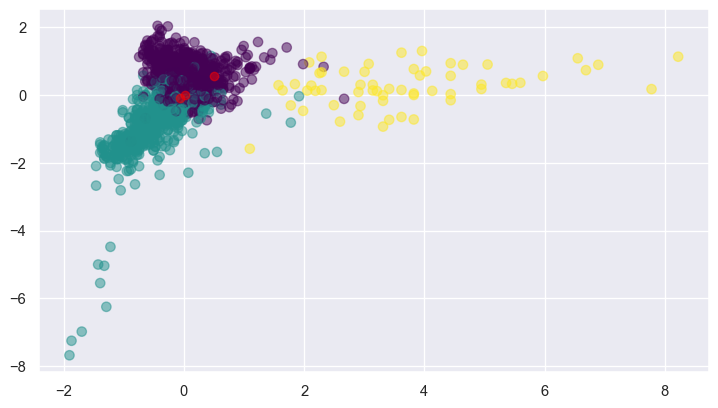

In [53]:
plt.figure(figsize=(9,5))

plt.scatter(scaled[:, 14], scaled[:, 27], c=y_kmeans, s=50, cmap='viridis', alpha=0.5)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=40, alpha=0.5);